# Histogram

In [1]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt

### Implement the suggested function:
$$
 f(x) = (z^2(x) + z^3(x) - 200 \,\, z^4(x) )\,\,\sin(\,\,100000\,\,(x + 0.5)\,\,),
 \\
 \text{where    }\:\:\: z(x) = \sin(3\,\,x)-0.5
$$

In [2]:
def f(x):
    z = cp.sin(3*x) - 0.5
    return (z**2 + z**3 - 200 * z**4) * cp.sin(100000 * (x + 0.5))

In [3]:
f_cupy = cp.ElementwiseKernel(
    'T x',
    'T f',
    '''
        T z = sin(3 * x) - 0.5;
        f = (z*z + z*z*z - 200*z*z*z*z) * sin(100000 * (x + 0.5));
    ''',
    'f_cupy'
)

### Plot function on the $x$ interval $[0,\,\, 1]$. Number of points = 10000000.

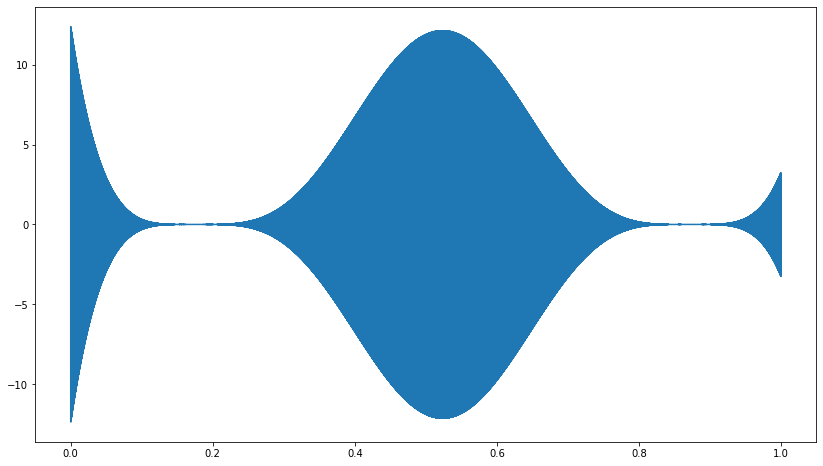

In [4]:
x = cp.linspace(0, 1, num=10_000_000)
f_x = f(x)
plt.figure(figsize=(14, 8))
plt.plot(x.get(), f_x.get())
plt.show()

### Get minimal and maximal values of function on the interval $[0,\,\, 1]$: $f_{min}$ and $f_{max}$.

In [5]:
f_x_min = float(f_x.min())
f_x_max = float(f_x.max())

### Divide $y=f(x), \: (x \in [0,\,\, 1]) \:$ interval $[f_{min}, f_{max}]$ into $10$ $y=f(x)$ subintervals of length $\delta$ equal to $0.1 \,\, (f_{max} f_{min})$: $[f_{min},\,\, f_{min} + \delta],\,\, [f_{min}+ \delta,\,\, f_{min} + 2 \,\, \delta],\,\, \dots,\,\, [f_{max}- \delta,\,\, f_{max}]$.

In [6]:
delta = 0.1 * (f_x_max - f_x_min)

intervals_from = cp.arange(f_x_min, f_x_max, delta)
intervals_to = delta + intervals_from

### Compute number of $y=f(x), \: (x \in [0,\,\, 1]) \:$ values in each subinterval. Use $\operatorname{cp.sum(\dots)}$

In [7]:
values_count = cp.empty(intervals_from.size)
for i in range(intervals_from.size):
    values_count[i] = cp.sum(cp.logical_and(f_x >= intervals_from[i], f_x <= intervals_to[i]))

### Plot histogram.

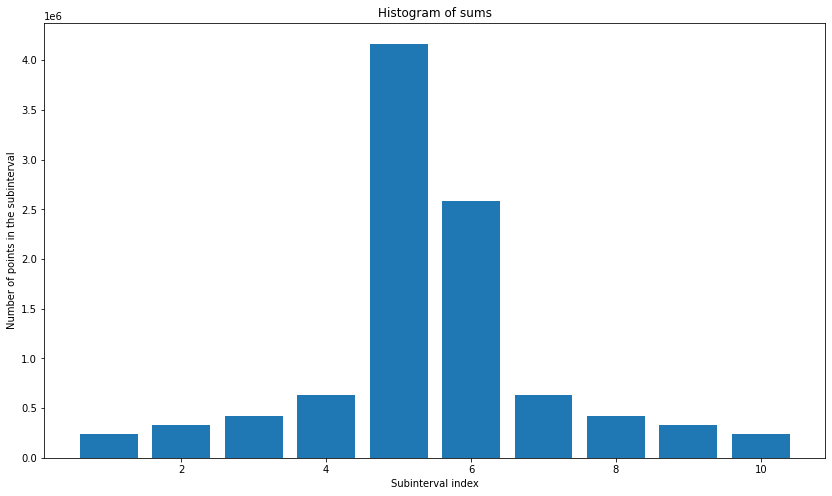

In [8]:
plt.figure(figsize=(14, 8))
plt.bar(range(1, 11), values_count.get())
plt.title('Histogram of sums')
plt.xlabel('Subinterval index')
plt.ylabel('Number of points in the subinterval');
plt.show()

## Difference

### Function

In [9]:
time_cp = %timeit -o -r 100 -n 100 f(x)

The slowest run took 4.11 times longer than the fastest. This could mean that an intermediate result is being cached.
15.8 ms ± 1.2 ms per loop (mean ± std. dev. of 100 runs, 100 loops each)


In [10]:
f_cupy(x)
time_cp_karnel = %timeit -o -r 100 -n 100 f_cupy(x)

The slowest run took 391.65 times longer than the fastest. This could mean that an intermediate result is being cached.
1.82 ms ± 605 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


### Cupy vs Cupy ElementwiseKernel

In [11]:
time_cp.best / time_cp_karnel.best

752.995678642627

### np.sum vs cp.sum

In [12]:
test_arr = np.random.random(20_000_000).astype(np.float32)
time_np = %timeit -o -r 100 -n 100 np.sum(test_arr)

4.81 ms ± 18.1 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


In [13]:
test_arr = cp.array(test_arr)
time_cp = %timeit -o -r 100 -n 100 cp.sum(test_arr)

The slowest run took 1106.28 times longer than the fastest. This could mean that an intermediate result is being cached.
9.39 ms ± 3.13 ms per loop (mean ± std. dev. of 100 runs, 100 loops each)


In [14]:
time_np.best / time_cp.best

506.43386444833766